In [1]:
import cv2
from numpy import array

def read_and_process_images(list_of_images):
    X = []
    y = []
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread("data21class/" + str(image), cv2.IMREAD_GRAYSCALE), (50,50), interpolation = cv2.INTER_CUBIC))
        
        if 'apple' in str(image):
            y.append(0)
        
        if 'ball' in str(image):
            y.append(1)
    
        if 'banana' in str(image):
            y.append(2)
        
        if 'bowl' in str(image):
            y.append(3)
            
        if 'calculator' in str(image):
            y.append(4)
        
        if 'cell' in str(image):
            y.append(5)
        
        if 'flashlight' in str(image):
            y.append(6)
        
        if 'food' in str(image):
            y.append(7)
        
        if 'garlic' in str(image):
            y.append(8)
            
        if 'instant' in str(image):
            y.append(9)
            
        if 'kleenex' in str(image):
            y.append(10)
            
        if 'lemon' in str(image):
            y.append(11)
    
        if 'lime' in str(image):
            y.append(12)
        
        if 'orange' in str(image):
            y.append(13)
        
        if 'plate' in str(image):
            y.append(14)
        
        if 'pliers' in str(image):
            y.append(15)
        
        if 'potato' in str(image):
            y.append(16)
            
        if 'scissors' in str(image):
            y.append(17)
        
        if 'shampoo' in str(image):
            y.append(18)
        
        if 'tomato' in str(image):
            y.append(19)
        
        if 'water' in str(image):
            y.append(20)
        
    return array(X),array(y)

In [7]:
file_names=[]


In [8]:
import os
dirListing = os.listdir("data21class")
for filename in dirListing:
    file_names.append(str(filename))

In [9]:
len(file_names)


5556

In [13]:
X, y = read_and_process_images(file_names)


In [14]:
y.shape


(5556,)

Training data shape (5000, 50, 50, 1)
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 50)        1300      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 50)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 100)       125100    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 100)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 200)       500200    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 200)         0         
________________________________

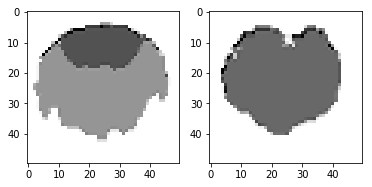

In [15]:
# Download and visualize the data: see all here https://www.tensorflow.org/api_docs/python/tf/keras/datasets
import tensorflow as tf

start = 0 
middle = 5000
end = 5556
X_train = X[0:middle].reshape(X[0:middle].shape[0], 50, 50,1)
y_train = tf.keras.utils.to_categorical(y[0:middle], 21)


X_val = X[middle:end].reshape(X[middle:end].shape[0], 50, 50, 1)
y_val = tf.keras.utils.to_categorical(y[middle:end], 21)


from matplotlib import pyplot as plt
%matplotlib inline

print('Training data shape', X_train.shape)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train[0].reshape(50,50), cmap=plt.cm.Greys);
ax2.imshow(X_train[5].reshape(50,50), cmap=plt.cm.Greys);


# Build your DNN, an example model is given for you.
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(50, (5,5), padding='same', activation='relu', input_shape=(50, 50,1)),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(100, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),

    tf.keras.layers.Conv2D(200, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(200, (5,5), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(200, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),

    tf.keras.layers.Conv2D(400, (5,5), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(400, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),

    tf.keras.layers.Conv2D(200, (5,5), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(200, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(21, activation='softmax')
])

model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


In [16]:
hist1 = model.fit(X_train, y_train,
          batch_size=50,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 5000 samples, validate on 556 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
5000/5000 [==============================] - 51s 10ms/sample - loss: 2.2712 - acc: 0.2766 - val_loss: 1.4056 - val_acc: 0.5090
Epoch 2/10
5000/5000 [==============================] - 47s 9ms/sample - loss: 0.9878 - acc: 0.6424 - val_loss: 0.9581 - val_acc: 0.6673
Epoch 3/10
5000/5000 [==============================] - 48s 10ms/sample - loss: 0.6455 - acc: 0.7590 - val_loss: 0.6037 - val_acc: 0.7770
Epoch 4/10
5000/5000 [==============================] - 47s 9ms/sample - loss: 0.5080 - acc: 0.8054 - val_loss: 0.4228 - val_acc: 0.8309
Epoch 5/10
5000/5000 [==============================] - 47s 9ms/sample - loss: 0.4189 - acc: 0.8400 - val_loss: 0.5052 - val_acc: 0.8112
Epoch 6/10
5000/5000 [==============================] - 47s 9ms/sample - loss: 0.3356 - acc: 0.8728 - val_loss: 0.3808 - val_acc: 0.8543
Epoch 7/10
5000/5000 [==============================] - 47s 9ms/sample - loss: 0.

In [17]:
predictions = model.predict(X_val.reshape(X_val.shape[0], 50, 50,1))

In [18]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_val.argmax(axis=1), predictions.argmax(axis=1))

In [19]:
matrix

array([[18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  5,  0],
       [ 0, 43,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 14,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1, 41,  0,  1,  4,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 36,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 41,  0,  0,  0,  0,  0,  0,
         0,  0,  0,

In [ ]:
textlist = ['apple','ball','banana','bowl','calculator','cell','flashlight','food','garlic','instant','kleenex','lemon','lime','orange','plate','pliers' in str(image):
        
        if 'potato' in str(image):
            
        if 'scissors' in str(image):
        
        if 'shampoo' in str(image):
        
        if 'tomato' in str(image):
        
        if 'water' in str(image):


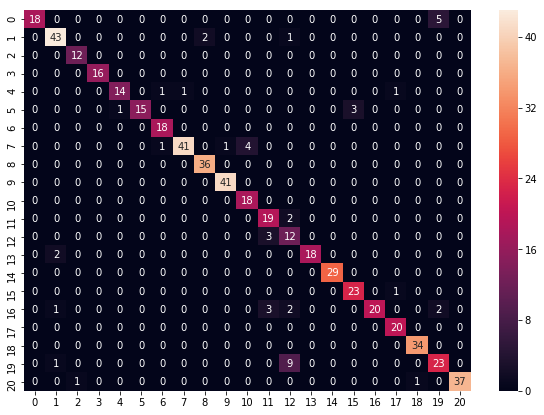

In [20]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(matrix, index = [i for i in range(21)],
                  columns = [i for i in range(21)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)